## Comparative analysis of border and non-border cities in Mexico 

#### We analyze how employment, wages and the number of factories in Mexico evolved between 2007 and 2021. Also between 2016 and 2021

#### The border states are: Baja California, Sonora, Tamaulipas, Coahuila, Chihuahua and Nuevo Leon.

In [1]:
#import libraries
import pandas as pd
import numpy as np
import re

In [2]:
#Open Manufacturing workers data
df = pd.read_csv("data/total-jobs-mexico-refined.csv")
df

,Year,Quarter,City,Jobs,Border
0,2005,1,Acapulco,462422,No
1,2005,2,Acapulco,457457,No
2,2005,3,Acapulco,466297,No
3,2005,4,Acapulco,468169,No
4,2006,1,Acapulco,471384,No
...,...,...,...,...,...
13255,2020,4,Zacatecas,29895,No
13256,2021,1,Zacatecas,21483,No
13257,2021,2,Zacatecas,24310,No
13258,2021,3,Zacatecas,18271,No


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13260 entries, 0 to 13259
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Year     13260 non-null  int64 
 1   Quarter  13260 non-null  int64 
 2   City     13260 non-null  object
 3   Jobs     11275 non-null  object
 4   Border   13260 non-null  object
dtypes: int64(2), object(3)
memory usage: 518.1+ KB


In [4]:
df["Jobs"] = pd.to_numeric(df["Jobs"], errors='coerce')
df

,Year,Quarter,City,Jobs,Border
0,2005,1,Acapulco,462422.0,No
1,2005,2,Acapulco,457457.0,No
2,2005,3,Acapulco,466297.0,No
3,2005,4,Acapulco,468169.0,No
4,2006,1,Acapulco,471384.0,No
...,...,...,...,...,...
13255,2020,4,Zacatecas,29895.0,No
13256,2021,1,Zacatecas,21483.0,No
13257,2021,2,Zacatecas,24310.0,No
13258,2021,3,Zacatecas,18271.0,No


In [5]:
#Compare change in employment, factory and salaries between border and non-border states
df2 = pd.DataFrame()
df2 ["Jobs-Border"] = list(df.query("Border == 'Yes'").groupby("Year")["Jobs"].agg("sum"))
df2 ["Jobs-NoBorder"] = list(df.query("Border == 'No'").groupby("Year")["Jobs"].agg("sum"))

In [6]:
df2

,Jobs-Border,Jobs-NoBorder
0,57000035.0,234487706.0
1,58786973.0,240025705.0
2,60938072.0,244583112.0
3,62991134.0,247863353.0
4,64744551.0,256414618.0
5,65577146.0,259896307.0
6,66721938.0,263220818.0
7,68550694.0,268829496.0
8,69450507.0,271567777.0
9,69976641.0,268316536.0


In [7]:
#Add year column
df2["Year"] = list(df["Year"].unique())
df2

,Jobs-Border,Jobs-NoBorder,Year
0,57000035.0,234487706.0,2005
1,58786973.0,240025705.0,2006
2,60938072.0,244583112.0,2007
3,62991134.0,247863353.0,2008
4,64744551.0,256414618.0,2009
5,65577146.0,259896307.0,2010
6,66721938.0,263220818.0,2011
7,68550694.0,268829496.0,2012
8,69450507.0,271567777.0,2013
9,69976641.0,268316536.0,2014


In [8]:
df3 = pd.DataFrame()

In [9]:
#Calculate percentage changes
df3 ["Year"] = df2["Year"]
df3["Job change - border"] = df2["Jobs-Border"] / df2["Jobs-Border"].iat[0] * 100 
df3["Job change - no border"] = df2["Jobs-NoBorder"] / df2["Jobs-NoBorder"].iat[0] * 100 

In [10]:
df3

,Year,Job change - border,Job change - no border
0,2005,100.000000,100.000000
1,2006,103.134977,102.361744
2,2007,106.908833,104.305303
3,2008,110.510694,105.704200
4,2009,113.586862,109.350986
5,2010,115.047554,110.835792
6,2011,117.055960,112.253569
7,2012,120.264302,114.645454
8,2013,121.842920,115.813226
9,2014,122.765961,114.426697


### Comparison between 2007 and 2021

<AxesSubplot:title={'center':'Manufacturing Jobs border v. no border (Mexico)'}, xlabel='Year'>

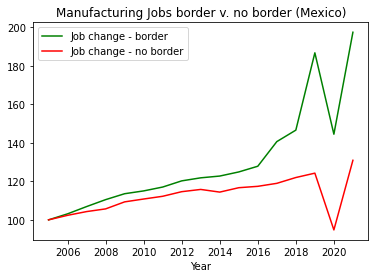

In [11]:
# Create a graphic
df3.plot(x="Year",
       y=["Job change - border", "Job change - no border"],
       title = "Manufacturing Jobs border v. no border (Mexico)",
       style = {"Job change - border":"green",
               "Job change - no border":"red"})

### Conclusions (2007 v 2021)
###### The number of manufacturing jobs increased in Mexico both on border (49%) and non-border (46%) states between 2016 and 2021. 
###### The number of factories declined between 2008 and 2015, but then rebounded both border and nonborder states. Now: similar level to 2007.
###### Manufacturing wages increased more on  border (40%) and non border (24%) states.

### Comparison between 2016 and 2021

In [12]:
#Changes since 2016
df31 = df3.query("Year > 2015")
df31

,Year,Job change - border,Job change - no border
11,2016,127.865244,117.427643
12,2017,140.664900,118.982006
13,2018,146.628747,122.001414
14,2019,186.795596,124.273367
15,2020,144.513973,94.779424
16,2021,197.489295,130.956602


In [13]:
#Calculate percentage changes
df31 ["Year"] = df31["Year"]
df31["Job change - border"] = df31["Job change - border"] / df31["Job change - border"].iat[0] * 100 
df31["Job change - no border"] = df31["Job change - no border"] / df31["Job change - no border"].iat[0] * 100 

<ipython-input-13-cadda788d352>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df31 ["Year"] = df31["Year"]
<ipython-input-13-cadda788d352>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df31["Job change - border"] = df31["Job change - border"] / df31["Job change - border"].iat[0] * 100
<ipython-input-13-cadda788d352>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation

<AxesSubplot:title={'center':'Manufacturing Jobs border v. no border (Mexico)'}, xlabel='Year'>

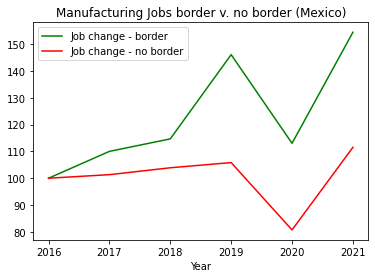

In [14]:
# Create a graphic
df31.plot(x="Year",
       y=["Job change - border", "Job change - no border"],
       title = "Manufacturing Jobs border v. no border (Mexico)",
       style = {"Job change - border":"green",
               "Job change - no border":"red"})

### Conclusions (2016 v 2021)
###### The number of manufacturing jobs increased in Mexico both on border (14%) and non-border (12%) states between 2016 and 2021. 
###### The number of factories rebounded both border (3%) and nonborder (3.5%) states. 
###### Manufacturing wages increased more on  border (28%) and non border (18%) states.